# Neural network MNIST fashion classification with Keras and Tensorflow
For inspiration:
* https://www.tensorflow.org/tutorials/keras/classification
* https://www.kaggle.com/zalando-research/fashionmnist
* https://github.com/zalandoresearch/fashion-mnist


In [25]:
# load core libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load Keras (from TensorFlow) for the dataset and building NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model

In [27]:
# MNIST Fashion provides training set of 60,000 examples and a test set of 10,000 examples.
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# load train/test datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


<Figure size 432x288 with 0 Axes>

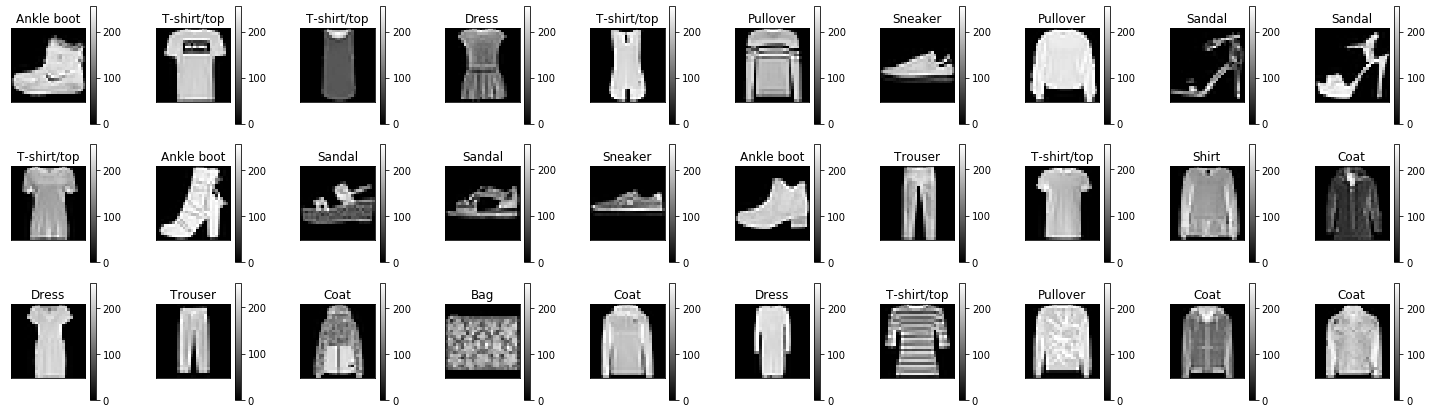

In [31]:
# Draw several figures
fig = plt.figure()
plt.figure(figsize=(20,6))
for i in range(30):
  plt.subplot(3,10,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title(classes[y_train[i]])
  plt.colorbar()
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

([], <a list of 0 Text yticklabel objects>)

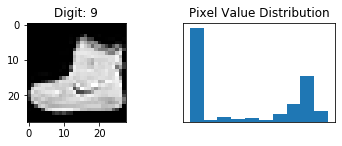

In [41]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.title("Digit: {}".format(y_train[0]))
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.subplot(2,2,2)
plt.title("Pixel Value Distribution")
plt.hist(X_train[0].reshape(784))
plt.xticks([])
plt.yticks([])

In [42]:
X_train = x_train.reshape(len(x_train), 784).astype('float32')
X_test = x_test.reshape(len(x_test), 784).astype('float32')

In [43]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [44]:
# print the final input shape ready for training
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [45]:
# create train/test categories
n_classes = len(classes)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

In [46]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam')

In [47]:
epochs = 30
batch_size = 128

# training the model and saving metrics in history
history = model.fit(
    X_train, Y_train,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5176 - accuracy: 0.8153 - val_loss: 0.4382 - val_accuracy: 0.8441
Epoch 2/30
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3723 - accuracy: 0.8642 - val_loss: 0.3703 - val_accuracy: 0.8671
Epoch 3/30
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3398 - accuracy: 0.8748 - val_loss: 0.3674 - val_accuracy: 0.8665
Epoch 4/30
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3193 - accuracy: 0.8829 - val_loss: 0.3614 - val_accuracy: 0.8667
Epoch 5/30
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2975 - accuracy: 0.8892 - val_loss: 0.3410 - val_accuracy: 0.8775
Epoch 6/30
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2866 - accuracy: 0.8940 - val_loss: 0.3252 - val_accuracy: 0.8819
Epoch 7/30
60000/60000 [==============================] 

In [48]:
# save trained weights into H5 file
import os

save_dir = 'results/'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# saving the model
model_name = 'keras_mnist_fashion_v1.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist_fashion_v1.h5 


In [49]:
# load model from saved file and evaluate test data
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

10000/1 - 1s - loss: 0.2833 - accuracy: 0.8992


In [50]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# see which we predicted correctly and which not
predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

Test Loss 0.35980279179811475
Test Accuracy 0.8992
8992  classified correctly
1008  classified incorrectly


In [51]:
predictions = mnist_model.predict(X_test)

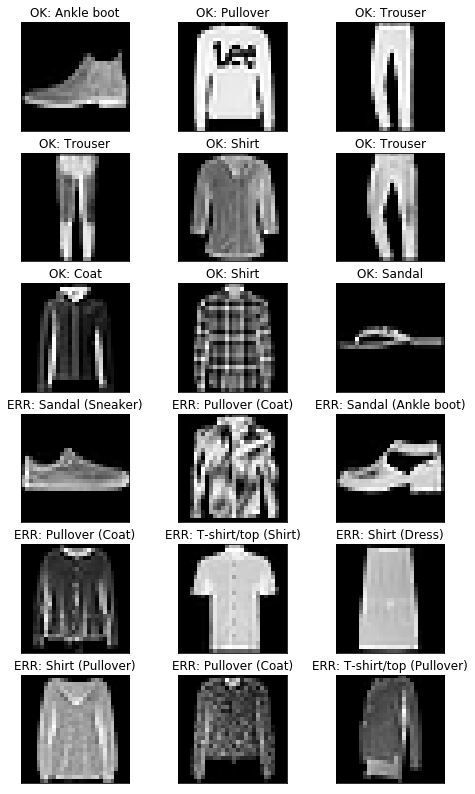

In [60]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (8, 14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "OK: {}".format(classes[predicted_classes[correct]]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "ERR: {} ({})".format(classes[predicted_classes[incorrect]], classes[y_test[incorrect]]))
    plt.xticks([])
    plt.yticks([])